<a href="https://colab.research.google.com/github/valdolab/GenerativeText/blob/main/TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of Text Generation
Toy example of how to Predicting the next work using LSTM.
This example I'll do it using english words.

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#step 1, creating the toy corpus
data = "Once upon a time, in a village called La Mancha, in Spain, there lived a man who loved to read about knights. Every day he would read about courageous knights and the incredible adventures they had. He was so absorbed in these stories that he hardly remembered to eat or sleep. \n The days of Knights and Squires, of exciting adventures and romances come alive in the hilarious account of Don Quixote's travels. As years passed, Don Quixote imagines himself placed in the world of knights. He convinces Sancho Panza, a peasant from the same village, to be his squire. And together they set out to seek their fortune, Don Quixote eager to be the best chivalrous knight. This delightful story of chivalry is all fun and pleasure, laughter and excitement, farce and suspense."


In [ ]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")
print(corpus)

['once upon a time, in a village called la mancha, in spain, there lived a man who loved to read about knights. every day he would read about courageous knights and the incredible adventures they had. he was so absorbed in these stories that he hardly remembered to eat or sleep. ', " the days of knights and squires, of exciting adventures and romances come alive in the hilarious account of don quixote's travels. as years passed, don quixote imagines himself placed in the world of knights. he convinces sancho panza, a peasant from the same village, to be his squire. and together they set out to seek their fortune, don quixote eager to be the best chivalrous knight. this delightful story of chivalry is all fun and pleasure, laughter and excitement, farce and suspense."]


In [ ]:
#step 2, train the tokenizer and create word encoding dictionary
tokenizer.fit_on_texts(corpus)

vocab_size = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'in': 3, 'to': 4, 'of': 5, 'a': 6, 'knights': 7, 'he': 8, 'don': 9, 'village': 10, 'read': 11, 'about': 12, 'adventures': 13, 'they': 14, 'quixote': 15, 'be': 16, 'once': 17, 'upon': 18, 'time': 19, 'called': 20, 'la': 21, 'mancha': 22, 'spain': 23, 'there': 24, 'lived': 25, 'man': 26, 'who': 27, 'loved': 28, 'every': 29, 'day': 30, 'would': 31, 'courageous': 32, 'incredible': 33, 'had': 34, 'was': 35, 'so': 36, 'absorbed': 37, 'these': 38, 'stories': 39, 'that': 40, 'hardly': 41, 'remembered': 42, 'eat': 43, 'or': 44, 'sleep': 45, 'days': 46, 'squires': 47, 'exciting': 48, 'romances': 49, 'come': 50, 'alive': 51, 'hilarious': 52, 'account': 53, "quixote's": 54, 'travels': 55, 'as': 56, 'years': 57, 'passed': 58, 'imagines': 59, 'himself': 60, 'placed': 61, 'world': 62, 'convinces': 63, 'sancho': 64, 'panza': 65, 'peasant': 66, 'from': 67, 'same': 68, 'his': 69, 'squire': 70, 'together': 71, 'set': 72, 'out': 73, 'seek': 74, 'their': 75, 'fortune': 76, 'eager': 77,

In [ ]:
#step 3, create N-gram sequence
input_sequences = []
for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)

#pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(
    input_sequences,
    maxlen=max_seq_len,
    padding='pre'
))


In [ ]:
#step 4, extract features and labels
x = input_seq_array[:,:-1]
labels = input_seq_array[:,-1]

#one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels,num_classes=vocab_size)

In [ ]:
print(tokenizer.word_index['village'])
print(x[0])
print(y[0])

10
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 17]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#DEFINE THE LSTM MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(vocab_size, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x,y, epochs=500, verbose=True)


Epoch 1/500
5/5 [==============================] - 5s 59ms/step - loss: 4.5312 - accuracy: 0.0382
Epoch 2/500
5/5 [==============================] - 0s 55ms/step - loss: 4.5197 - accuracy: 0.0763
Epoch 3/500
5/5 [==============================] - 0s 61ms/step - loss: 4.5102 - accuracy: 0.0763
Epoch 4/500
5/5 [==============================] - 0s 63ms/step - loss: 4.4997 - accuracy: 0.0840
Epoch 5/500
5/5 [==============================] - 0s 63ms/step - loss: 4.4847 - accuracy: 0.0840
Epoch 6/500
5/5 [==============================] - 0s 108ms/step - loss: 4.4608 - accuracy: 0.0763
Epoch 7/500
5/5 [==============================] - 1s 108ms/step - loss: 4.4255 - accuracy: 0.0687
Epoch 8/500
5/5 [==============================] - 1s 111ms/step - loss: 4.3729 - accuracy: 0.0534
Epoch 9/500
5/5 [==============================] - 1s 109ms/step - loss: 4.3322 - accuracy: 0.0382
Epoch 10/500
5/5 [==============================] - 1s 107ms/step - loss: 4.3096 - accuracy: 0.0458
Epoch 11/500
5

In [ ]:
#Visualize metrics
import matplotlib.pyplot as plt
def plot_metric(history, metric):
  """
  To make the plot of the metrics
  param:
    history: all the metrics calculated.
    metric: kind of metric
  return:
    the graph
  """
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

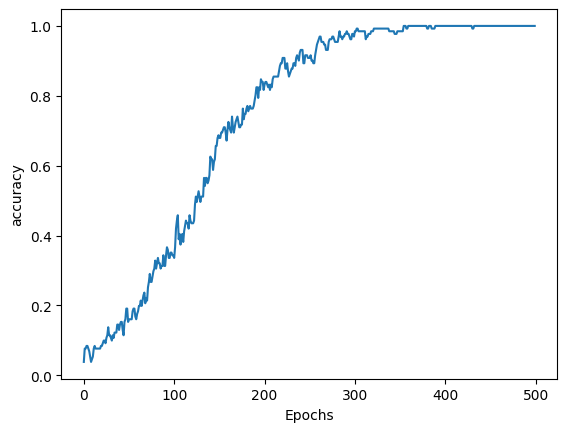

In [ ]:
plot_metric(history, "accuracy")

In [ ]:
def generate_sentence(seed_text="One day ", next_word = 30):

  """
  To generated the sentence using the trained model.
  param:
    seed_text (default = "One day "): the first words (seed) that the model will use to start generating the text based on that
    next_word (default = 30): the numbers of the works that you want to generate
  return:
    the generated text
  """

  for _ in range(next_word):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding="pre")

    #predict
    predicted = np.argmax(model.predict(token_list, verbose=False), axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  return seed_text


In [ ]:
#GENERATE NEW TEXT
seed_text = "this delightful story of "
#how many words wants to predict
next_word = 30
generated_sentence = generate_sentence(seed_text, next_word)
print(generated_sentence)

this delightful story of  knights and squires of exciting adventures and romances come alive in the hilarious account of don quixote's travels as years passed don quixote imagines himself placed in the world of


# Text Generation challenge
This notebook is a challenge on how to create text using LSTMs.
I´ll be using shakerpeare poetry as the training data and then use the trained network to predict the next words and generate meaningful sentences.

## Import libs

In [8]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfdata
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
import seaborn as sns

print(tf.__version__)

2.13.0


## Step 1: Create a corpus

In [4]:
# download data from this url, I'll download stories from wilian shakespeare
!wget --no-check-certificate https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt -O /tmp/sonnet.txt

--2023-10-09 21:36:11--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0.003s  

2023-10-09 21:36:11 (9.37 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [5]:
# print the text
shakespeare_text = open("/tmp/sonnet.txt").read()
print(len(shakespeare_text))

# create corpus by lowering the text and splitting the by /n (next lines)
corpus = shakespeare_text.lower().split("/n")
print(corpus)

28893
["i\n\n from fairest creatures we desire increase,\n that thereby beauty's rose might never die,\n but as the riper should by time decease,\n his tender heir might bear his memory:\n but thou, contracted to thine own bright eyes,\n feed'st thy light's flame with self-substantial fuel,\n making a famine where abundance lies,\n thy self thy foe, to thy sweet self too cruel:\n thou that art now the world's fresh ornament,\n and only herald to the gaudy spring,\n within thine own bud buriest thy content,\n and tender churl mak'st waste in niggarding:\n   pity the world, or else this glutton be,\n   to eat the world's due, by the grave and thee.\n\n ii\n\n when forty winters shall besiege thy brow,\n and dig deep trenches in thy beauty's field,\n thy youth's proud livery so gazed on now,\n will be a tatter'd weed of small worth held:\n then being asked, where all thy beauty lies,\n where all the treasure of thy lusty days;\n to say, within thine own deep sunken eyes,\n were an all-eat

### 1.1 Create Tokenizer

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# calculate vocabulary size = be mindful of token
vocab_size = len(tokenizer.word_index) + 1

# word encoding dictionary is showed
print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [42]:
# create a sequences of
input_sequences = []
for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding="pre"))

In [43]:
# creating features and label
# this is a classification proble, I need to convert the classes to one-hot encodding variables
# numbers of classes is equal to the vocab size

X = input_seq_array[:, :-1]
labels = input_seq_array[:,-1]

# one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [46]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)